In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from tester import *

In [20]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [21]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 200, 
    mutation_rate = 0.05,
    max_tree_depth = 8,
)

In [22]:
dataset = pd.read_csv("csv/Concrete_Data_Yeh.csv")
dataset.dropna(inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [23]:
tester = tester(X, y, generator, 8, 1, 400, verbose = True, test_size = 0.3, random_state = 17)

Split:  0 Feature:  0
Iteration:  199 Best fitness:  0.6185288658054113 Generation best 0.5809161307258178
Split:  0 Feature:  1
Iteration:  199 Best fitness:  0.616728854555341 Generation best 0.5496784354902218
Split:  0 Feature:  2
Iteration:  199 Best fitness:  0.6106163163519772 Generation best 0.5948287176794855
Split:  0 Feature:  3


C:\Users\David Arcos\AppData\Local\Temp\ipykernel_11152\1723502936.py:11: RuntimeWarning: divide by zero encountered in true_divide
  return x / (y + 1e-10)


Iteration:  199 Best fitness:  0.6086100538128363 Generation best 0.5806536290851818
Split:  0 Feature:  4
Iteration:  199 Best fitness:  0.5877786736167101 Generation best 0.5402471265445409
Split:  0 Feature:  5
Iteration:  199 Best fitness:  0.5877411733823337 Generation best 0.5362908518178239
Split:  0 Feature:  6
Iteration:  199 Best fitness:  0.6164288526803292 Generation best 0.5956912230701442
Split:  0 Feature:  7
Iteration:  199 Best fitness:  0.6530103313145708 Generation best 0.6204976281101757


In [24]:
for tree in tester.trees:
    tree.root.update_depth(1)
    print(tree.root.get_max_depth())

8
8
8
8
8
8
8
8


In [25]:
tester.test_models(notests=20)

Iteration 4 - MSE 25.44724989963745, R2 0.9048730800472338, MAE 3.7948942224004494, NEW_MSE 28.759201003108647, NEW_R2 0.8924923430815521, NEW_MAE 3.9231304069768904
Iteration 9 - MSE 25.44724989963745, R2 0.9048730800472338, MAE 3.7948942224004494, NEW_MSE 28.759201003108647, NEW_R2 0.8924923430815521, NEW_MAE 3.9231304069768904
Iteration 14 - MSE 25.44724989963745, R2 0.9048730800472338, MAE 3.7948942224004494, NEW_MSE 28.759201003108647, NEW_R2 0.8924923430815521, NEW_MAE 3.9231304069768904
Iteration 19 - MSE 25.44724989963745, R2 0.9048730800472338, MAE 3.7948942224004494, NEW_MSE 28.759201003108647, NEW_R2 0.8924923430815521, NEW_MAE 3.9231304069768904
Iteration 4 - MSE 100.35262456092083, R2 0.6248617779403849, MAE 7.8446744296052096, NEW_MSE 47.816179591805145, NEW_R2 0.821253537949437, NEW_MAE 5.38474900856161
Iteration 9 - MSE 100.102375275657, R2 0.6257972599206152, MAE 7.83562074428822, NEW_MSE 47.579684188142664, NEW_R2 0.822137605163856, NEW_MAE 5.391709489867373
Iteration

In [26]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,25.447250,0.904873,3.794894,28.759201,0.892492,3.923130
1,SGDRegressor,100.014351,0.626126,7.818262,47.810681,0.821274,5.393643
2,GradientBoostingRegressor,39.676272,0.851682,3.923969,38.257875,0.856984,3.934358


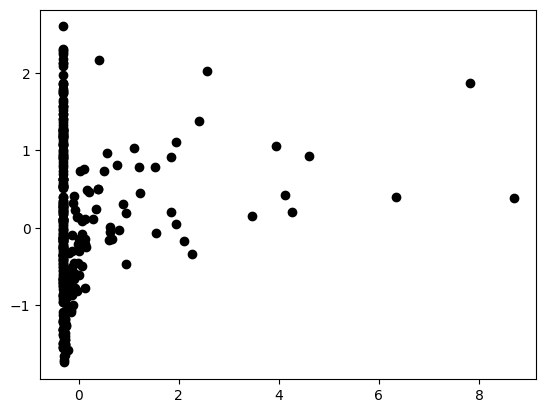

Min:  -0.31507428038776786 Max:  8.693911091276533 Mean:  0.021048224145410063 Std:  1.0414206471196177


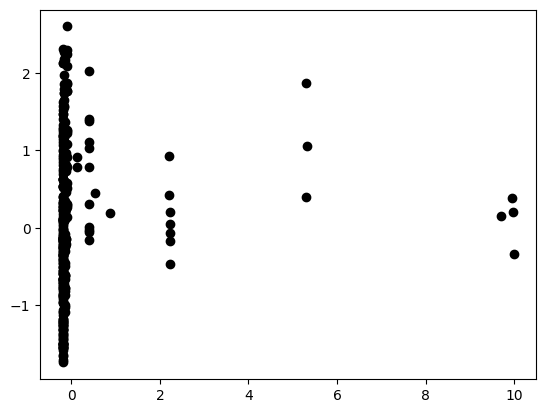

Min:  -0.19384586296039813 Max:  9.989556873153207 Mean:  0.09333459793774704 Std:  1.296758480247481


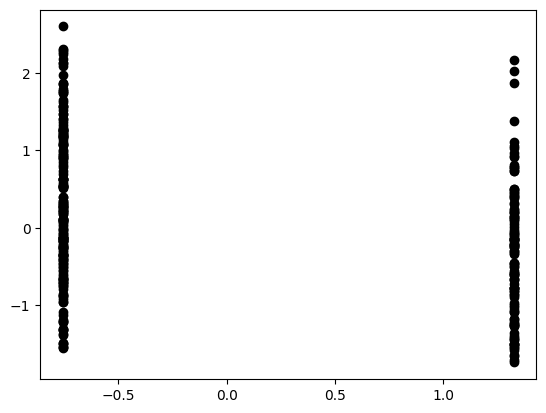

Min:  -0.7555237035138472 Max:  1.3235968139674896 Mean:  0.031720027588182965 Std:  1.0084709538901506


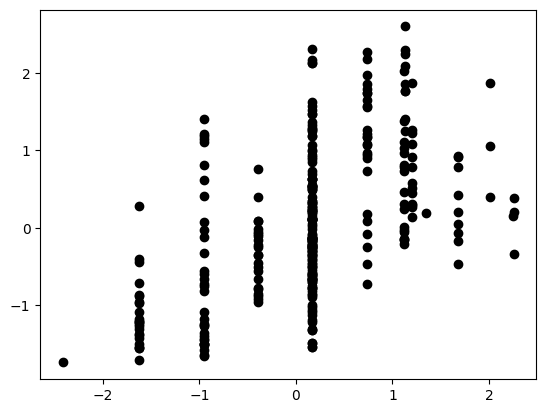

Min:  -2.4154198848999138 Max:  2.255262681571295 Mean:  0.12282704263324914 Std:  0.8622130809054026


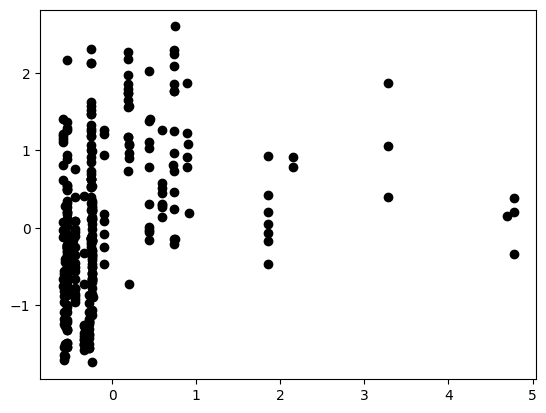

Min:  -0.5853742794980179 Max:  4.7758245365078595 Mean:  -0.04509646590590005 Std:  0.8339674702324269


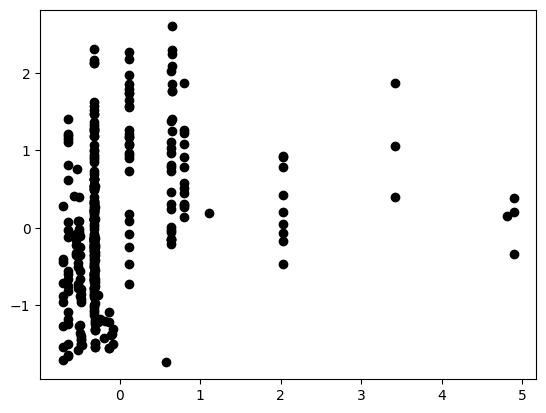

Min:  -0.7081026565643278 Max:  4.893519176245689 Mean:  -0.02041926593226096 Std:  0.855324236866358


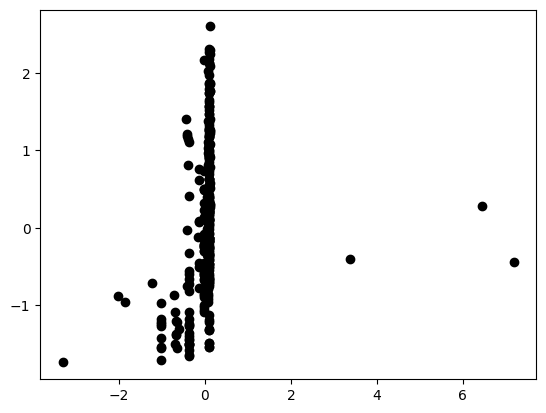

Min:  -3.305523909919922 Max:  7.181532844539663 Mean:  -0.00456464081268798 Std:  0.6842504496994121


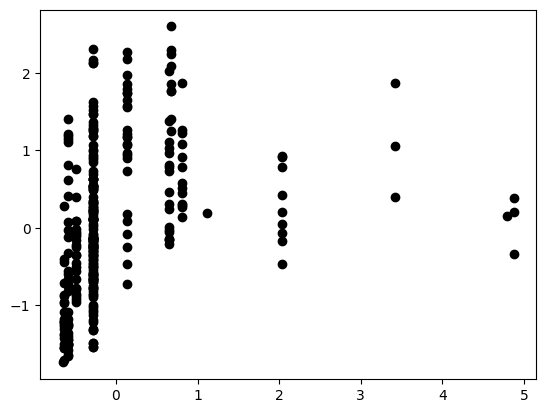

Min:  -0.6515208063400345 Max:  4.875179197966093 Mean:  -0.019717181337544312 Std:  0.8566434980266503


In [27]:
for i in range(tester.X_test.shape[1],tester.new_X_test.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_test[:,i], tester.y_test, color = 'black')
    plt.show()
    print("Min: ", tester.new_X_test[:, i].min(), "Max: ", tester.new_X_test[:, i].max(), "Mean: ", tester.new_X_test[:, i].mean(), "Std: ", tester.new_X_test[:, i].std())